In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

In [15]:
df = pd.read_csv("emails.csv")

In [16]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [19]:
X_text = df['text']
y = df['spam']

In [20]:
cv_binary = CountVectorizer(stop_words='english', binary=True)
cv_count  = CountVectorizer(stop_words='english')

In [21]:
X_binary = cv_binary.fit_transform(X_text)
X_count  = cv_count.fit_transform(X_text)

In [22]:
X_binary

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 508419 stored elements and shape (5728, 36996)>

In [23]:
X_count

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 508419 stored elements and shape (5728, 36996)>

In [24]:
Xb_train, Xb_test, y_train, y_test = train_test_split(X_binary, y, test_size=0.2, random_state=42)
Xc_train, Xc_test, _, _            = train_test_split(X_count,  y, test_size=0.2, random_state=42)

In [25]:
bnb = BernoulliNB()
bnb.fit(Xb_train, y_train)
y_pred_bnb = bnb.predict(Xb_test)

In [27]:
print("BernoulliNB Accuracy:", accuracy_score(y_test, y_pred_bnb))

BernoulliNB Accuracy: 0.9729493891797557


In [26]:
mnb = MultinomialNB()
mnb.fit(Xc_train, y_train)
y_pred_mnb = mnb.predict(Xc_test)

In [ ]:
print("MultinomialNB Accuracy:", accuracy_score(y_test, y_pred_mnb))

MultinomialNB Accuracy: 0.9904013961605584


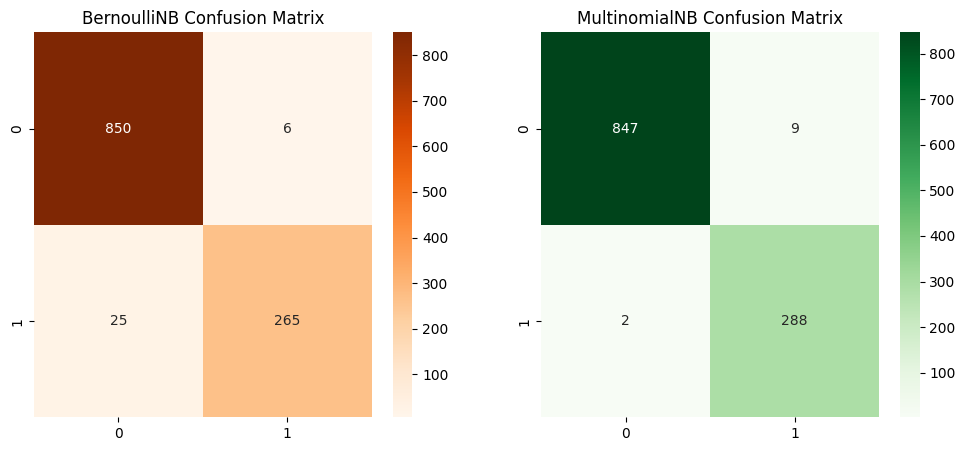

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix(y_test, y_pred_bnb), annot=True, fmt='d',
            cmap='Oranges', ax=axs[0])
axs[0].set_title("BernoulliNB Confusion Matrix")

sns.heatmap(confusion_matrix(y_test, y_pred_mnb), annot=True, fmt='d',
            cmap='Greens', ax=axs[1])
axs[1].set_title("MultinomialNB Confusion Matrix")

plt.show()